# Аналитика в Pandas

## Импорт библиотек, загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
import datetime
from sklearn.preprocessing import StandardScaler

Сегодня мы попытаем решить задачу предсказания отклика клиента на маркетинговую кампанию на открытом датасете.https://www.kaggle.com/datasets/jackdaoud/marketing-data/data

In [ ]:
df = pd.read_csv('https://github.com/evgpat/datasets/raw/main/ifood_df_raw.csv')

## Exploratory Data Analysis (EDA)

При решении любой аналитической / ML задачи важно предварительно хорошо понять наши данные.
Поэтому начнем мы с проведения исследовательского анализа данных (EDA).
Это поможет нам:
* Понять структуру и содержание наших данных
* Выявить возможные проблемы с данными (пропущенные значения, дубликаты, выбросы)
* Определить основные характеристики переменных, распределение)
* Определить взаимосвязи между переменными

Посмотрим на наши данные.

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


AcceptedCmp1 — клиент принял оффер 1-ой кампании (1 - да, 0 - нет)  
AcceptedCmp2 — клиент принял оффер 2-ой кампании (1 - да, 0 - нет)  
AcceptedCmp3 — клиент принял оффер 3-ой кампании (1 - да, 0 - нет)  
AcceptedCmp4 — клиент принял оффер 4-ой кампании (1 - да, 0 - нет)  
AcceptedCmp5 — клиент принял оффер 5-ой кампании (1 - да, 0 - нет)    
Dt_Customer — дата
Complain — жаловался ли клиент в последние два года  
Income — доход   
Kidhome — количество маленьких детей  
Teenhome — количество детей-подростков  
Year_Birth — дата рождения  
Income — доход домохозяйства  
Траты на конкретные продукты:      
* MntFishProducts
* MntFruits
* MntGoldProds
* MntMeatProducts
* MntSweetProducts
* MntWines

NumCatalogPurchases — количество покупок из каталога  
NumDealsPurchases — количество покупок со скидкой  
NumStorePurchases — количество покупок в физических магазинах  
NumWebPurchases — количество покупок через Интернет  
NumWebVisitsMonth — количество визитов на сайт  

Recency — количество дней с последней покупки   

Education — уровень образования:
Marital_Status — семейное положение

**Response** — отклик на последнюю кампанию (будущая целевая переменная)

Начнем с метода  `df.info()`- посмотрим на типы столбцов, пропущенные значения и т.п.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum() # проверяем пропуски

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Видим, что столбец `Income` содержит пропуски

In [ ]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Вернёмся к этом проблеме позже.

Теперь используем метод `.describe()`, чтобы посчитать основные описательные статистики для числовых столбцов

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1) # удаляем признаки с нулевой дисперсией

In [ ]:
df.shape

(2240, 27)

Теперь посчитаем статистики для категориальных переменных:

In [ ]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [ ]:
df.select_dtypes(['int']).columns

Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [ ]:
int_columns = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

Построим распределения числовых переменных:

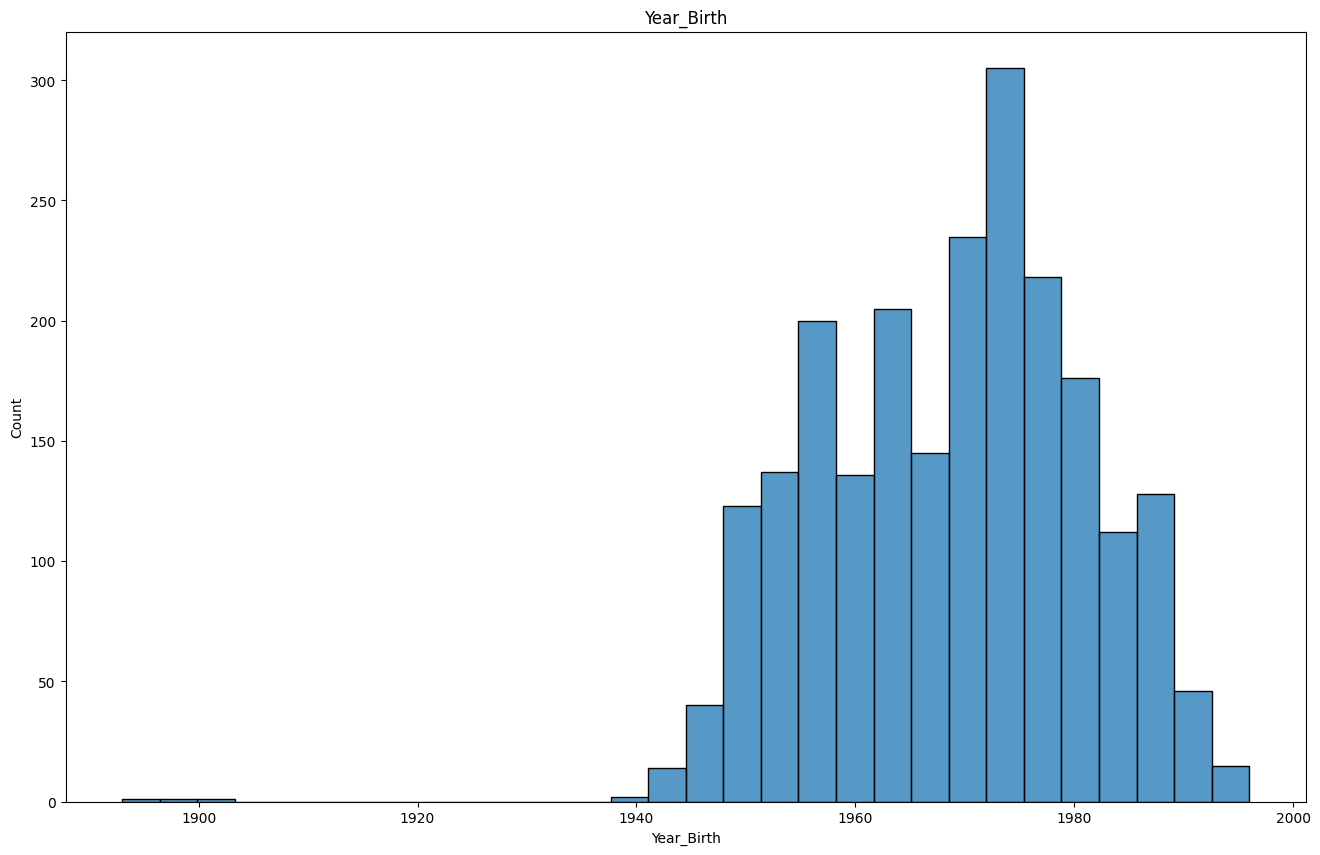

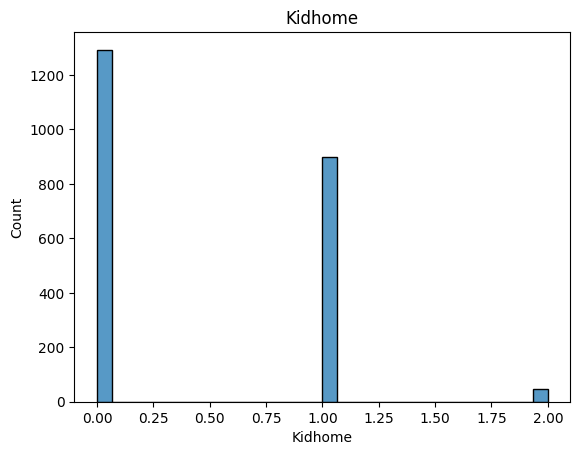

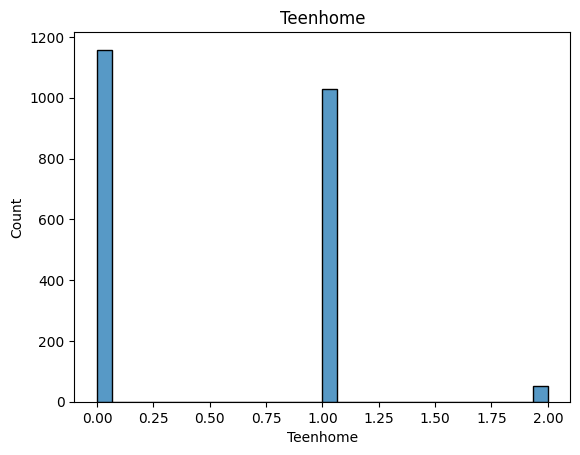

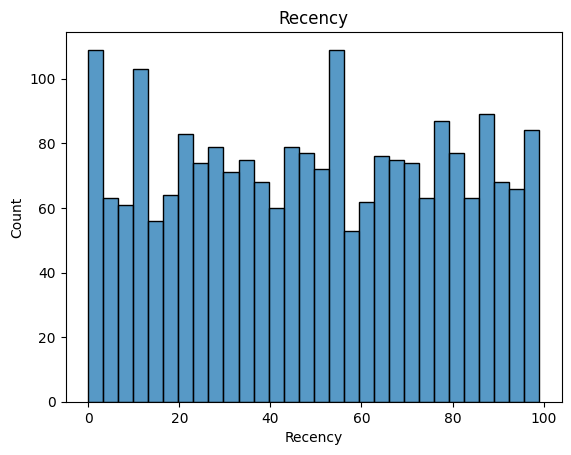

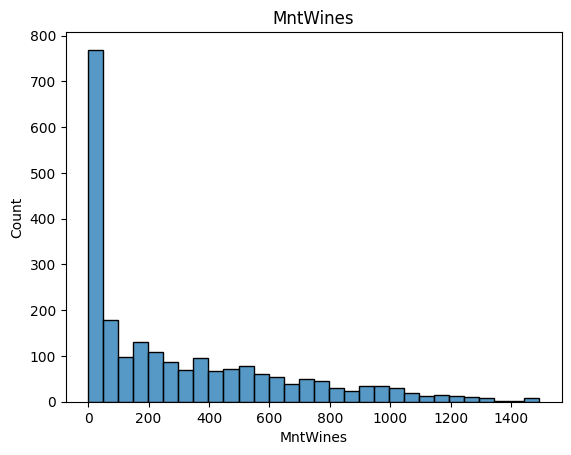

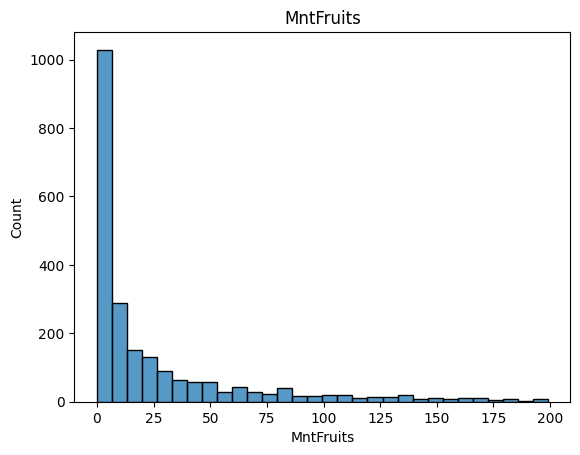

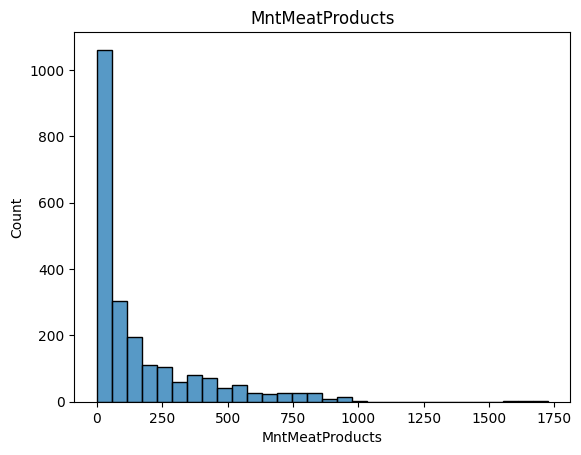

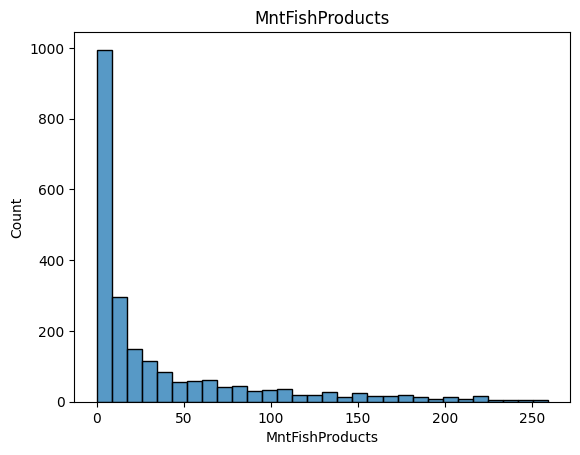

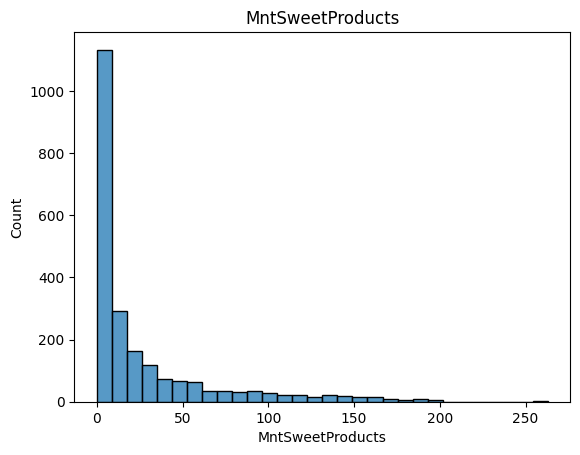

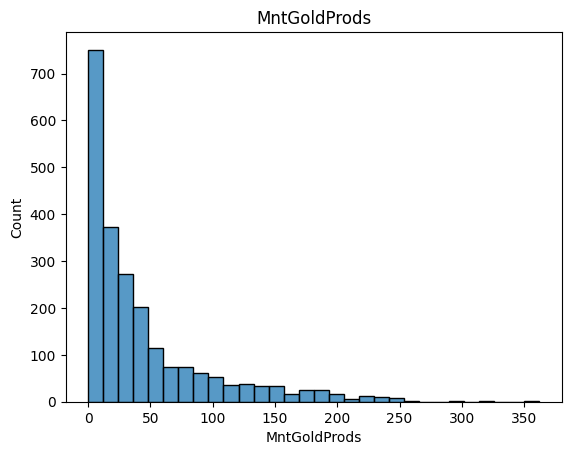

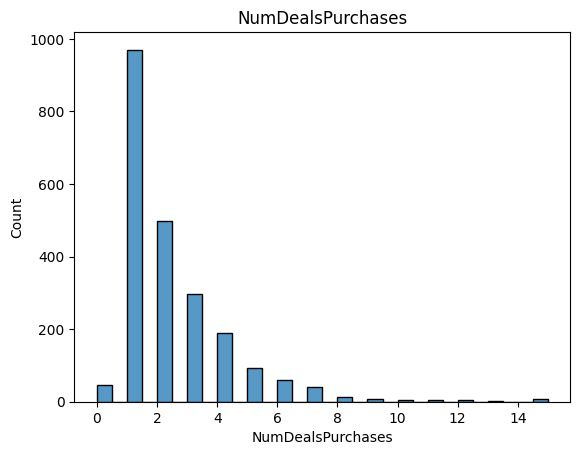

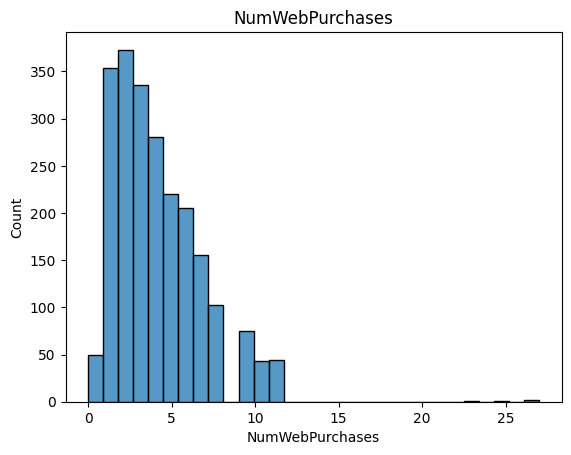

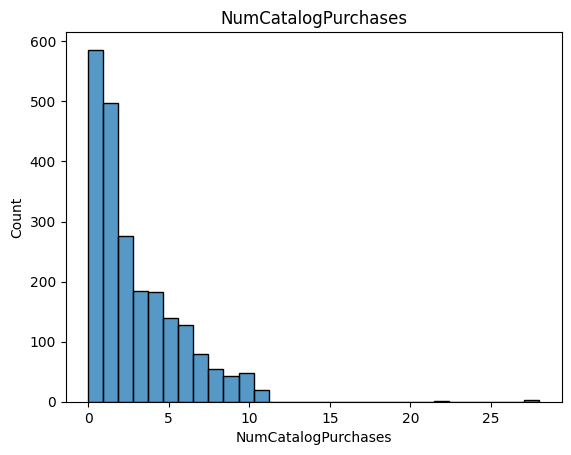

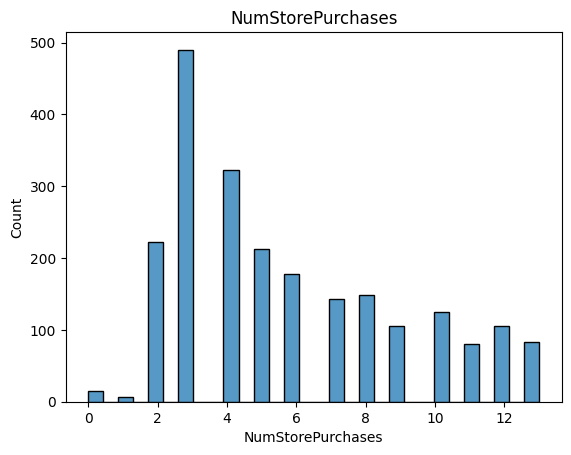

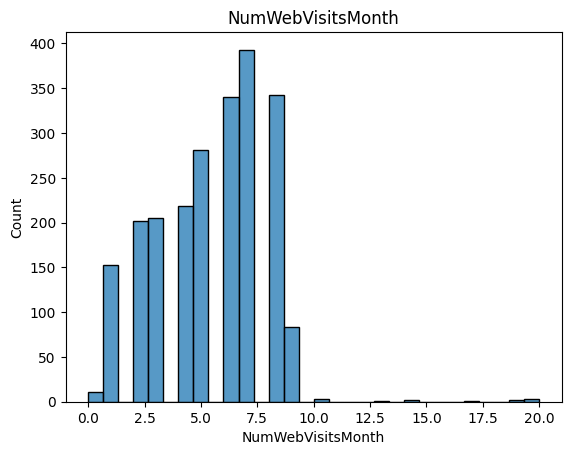

In [ ]:
plt.figure(figsize=(16, 10))

for var in int_columns:
    sns.histplot(df[var], bins=30)
    plt.title(var)
    plt.show()

Теперь давайте сравнием распределения среди групп клиентов, у которых `Response = 1` и у которых `Response = 0`

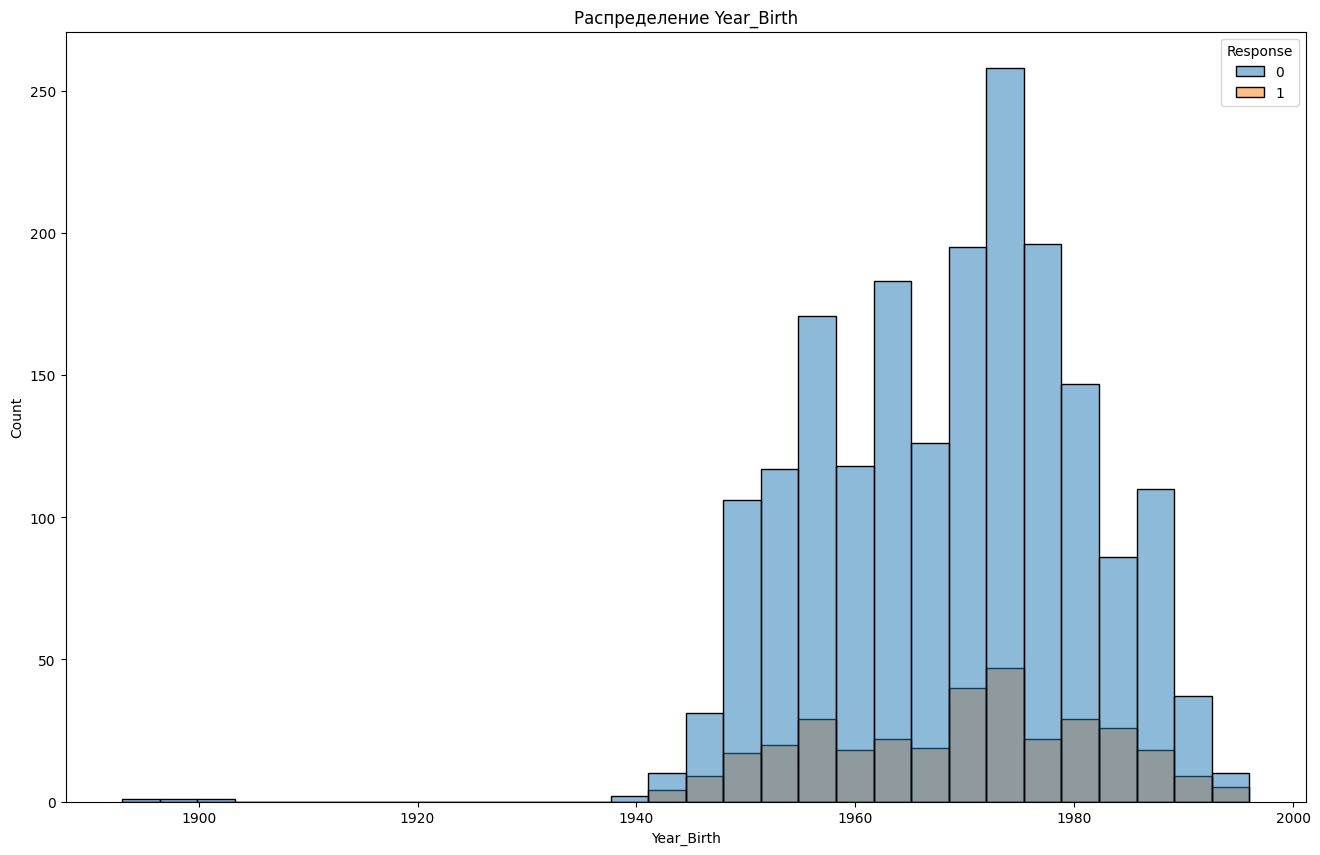

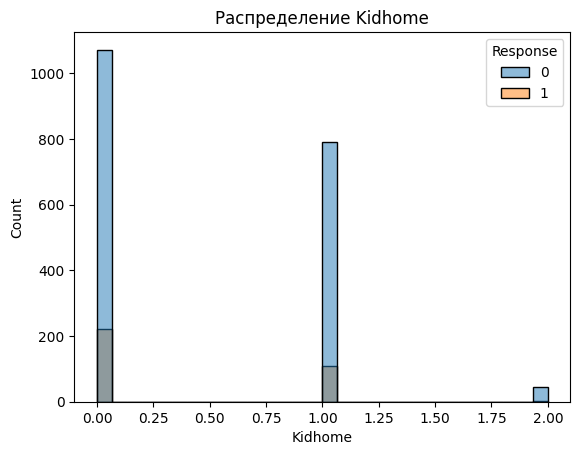

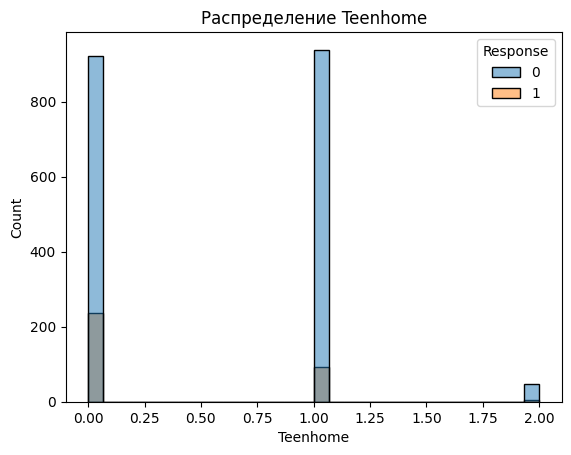

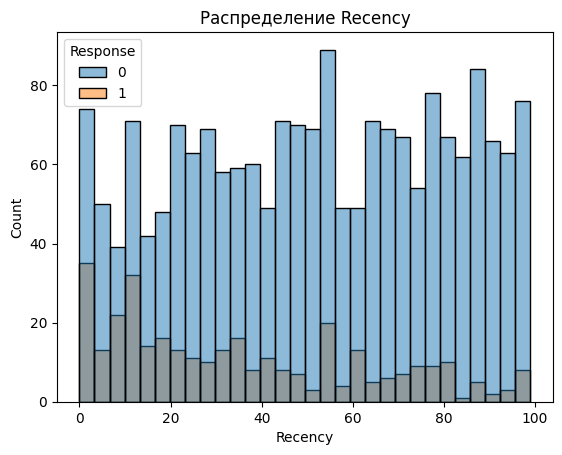

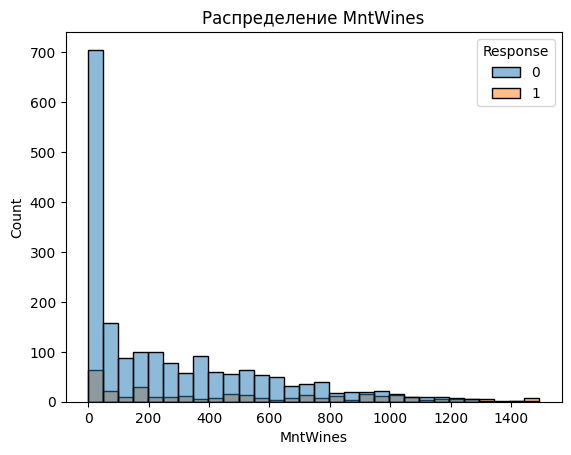

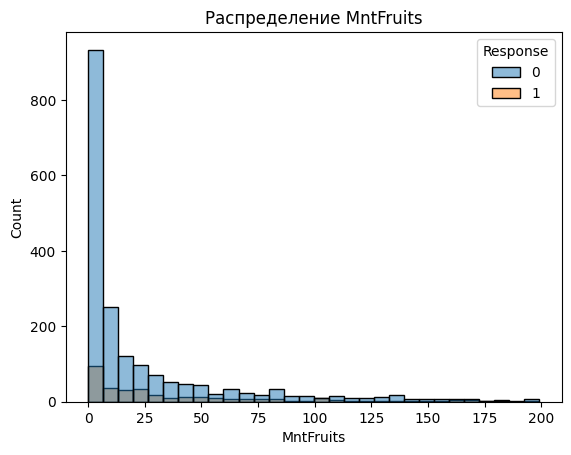

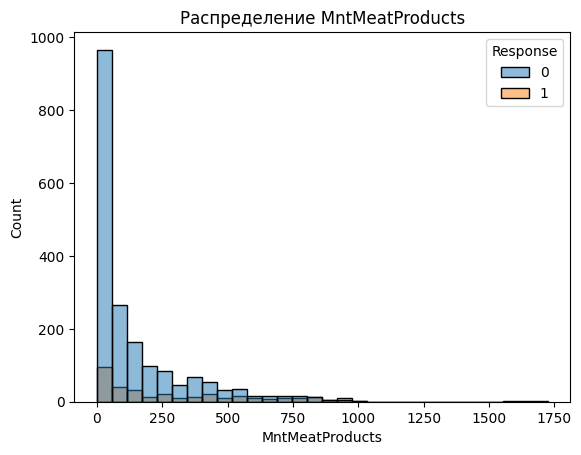

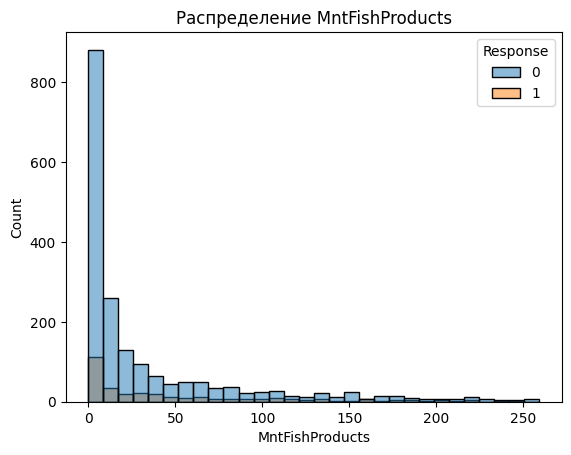

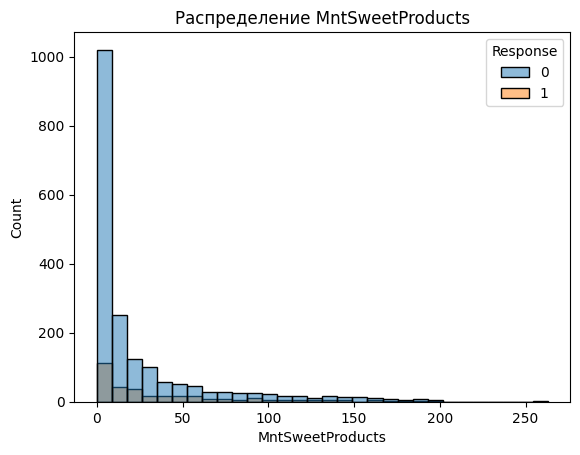

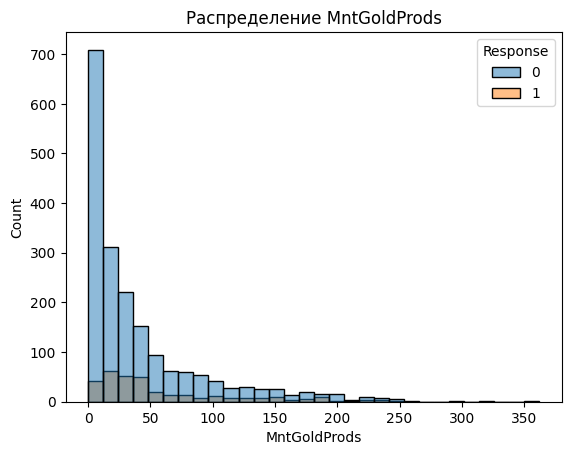

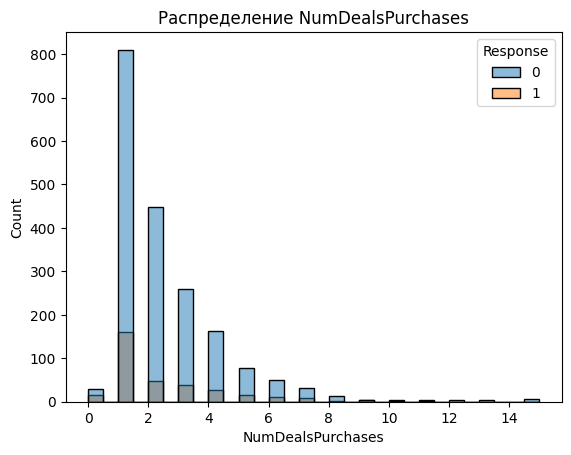

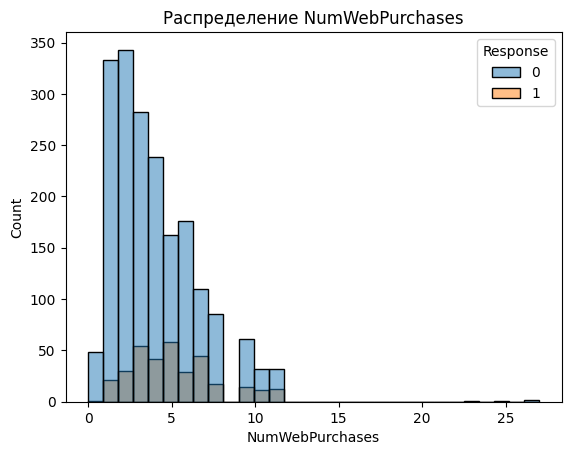

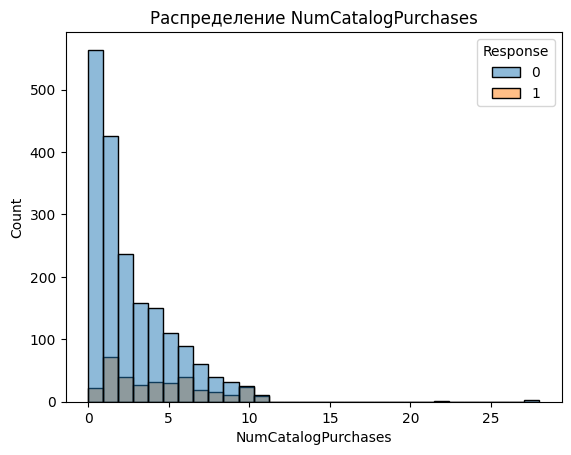

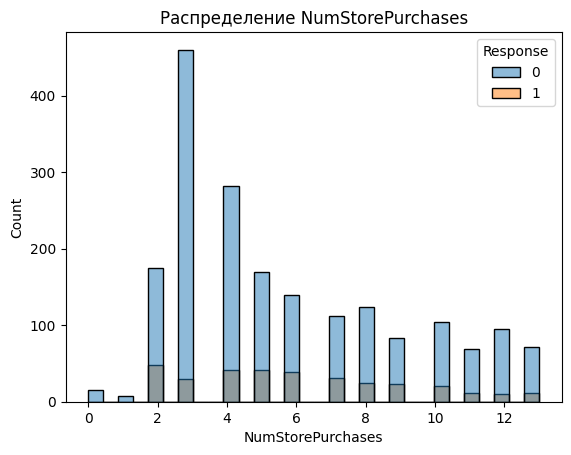

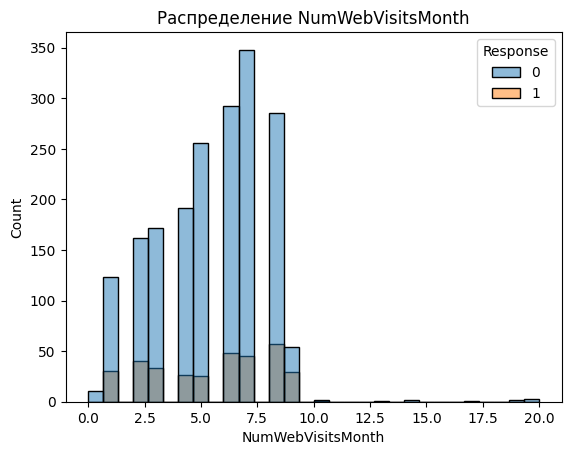

In [ ]:
plt.figure(figsize=(16, 10))

for var in int_columns:
    sns.histplot(df, x = var, hue = 'Response', bins=30)
    plt.title(f'Распределение {var}')
    plt.show()

In [ ]:
df.groupby(['Response'])[['Income', 'Teenhome', 'Kidhome']].describe()

Income                                                        \
           count          mean           std     min      25%      50%   
Response                                                                 
0         1883.0  50839.132767  25252.804747  1730.0  34421.0  50150.0   
1          333.0  60209.675676  23194.080987  7500.0  39763.0  64090.0   

                            Teenhome            ...           Kidhome  \
              75%       max    count      mean  ...  75%  max   count   
Response                                        ...                     
0         66308.0  666666.0   1906.0  0.541448  ...  1.0  2.0  1906.0   
1         80589.0  105471.0    334.0  0.305389  ...  1.0  2.0   334.0   

                                                       
              mean       std  min  25%  50%  75%  max  
Response                                               
0         0.462225  0.544975  0.0  0.0  0.0  1.0  2.0  
1         0.341317  0.487347  0.0  0.0  0.0  1.0  2.0  

[2 rows x 24 columns]

In [ ]:
df.groupby(['Response'])[['Income', 'Teenhome', 'Kidhome']].describe()

Income                                                        \
           count          mean           std     min      25%      50%   
Response                                                                 
0         1883.0  50839.132767  25252.804747  1730.0  34421.0  50150.0   
1          333.0  60209.675676  23194.080987  7500.0  39763.0  64090.0   

                            Teenhome            ...           Kidhome  \
              75%       max    count      mean  ...  75%  max   count   
Response                                        ...                     
0         66308.0  666666.0   1906.0  0.541448  ...  1.0  2.0  1906.0   
1         80589.0  105471.0    334.0  0.305389  ...  1.0  2.0   334.0   

                                                       
              mean       std  min  25%  50%  75%  max  
Response                                               
0         0.462225  0.544975  0.0  0.0  0.0  1.0  2.0  
1         0.341317  0.487347  0.0  0.0  0.0  1.0  2.0  

[2 rows x 24 columns]

In [ ]:
df.select_dtypes(['object']).columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

Теперь построим графики бинарных и категориальных переменных.

<Axes: xlabel='Response', ylabel='count'>

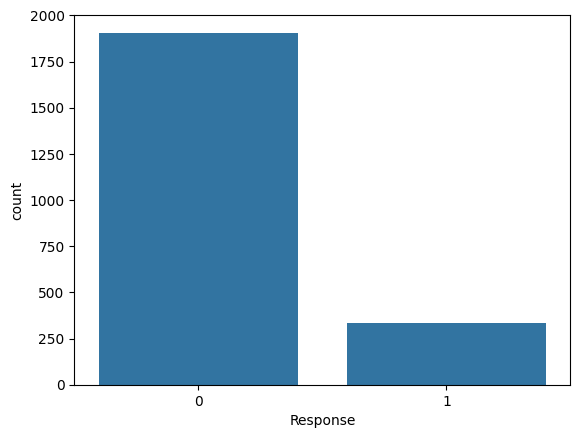

In [ ]:
sns.countplot(data=df, x = 'Response')

In [ ]:
categorical_variables = ['Education', 'Marital_Status']

In [ ]:
bool_variables = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']

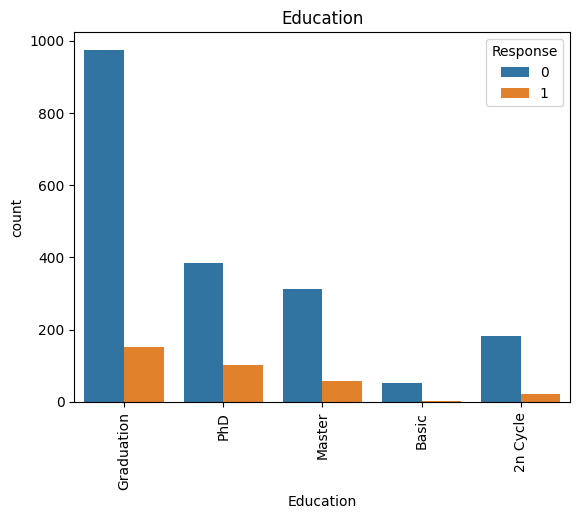

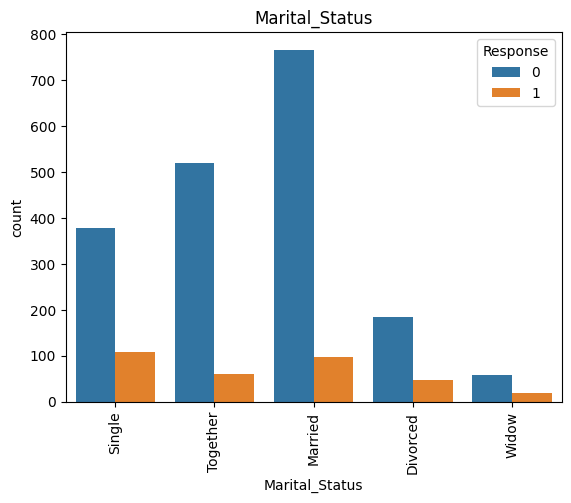

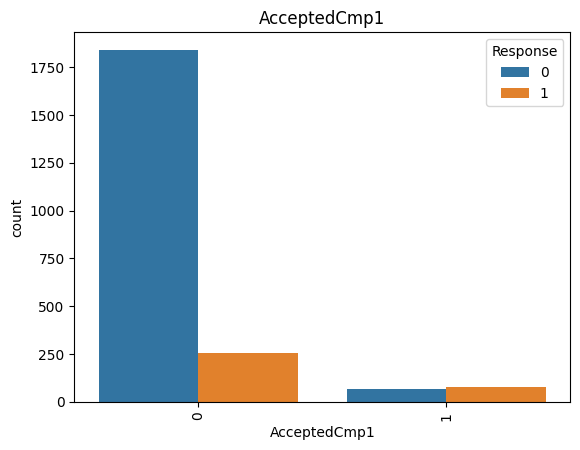

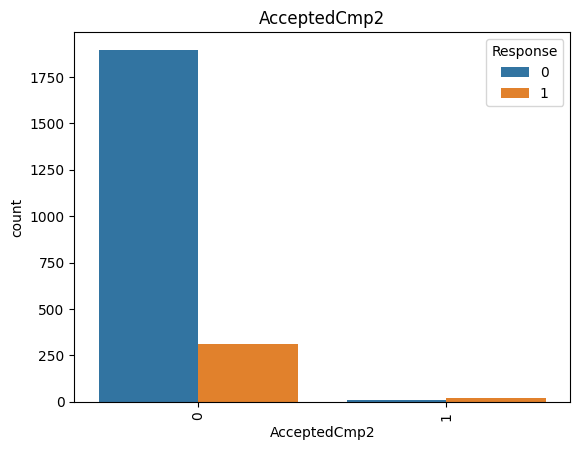

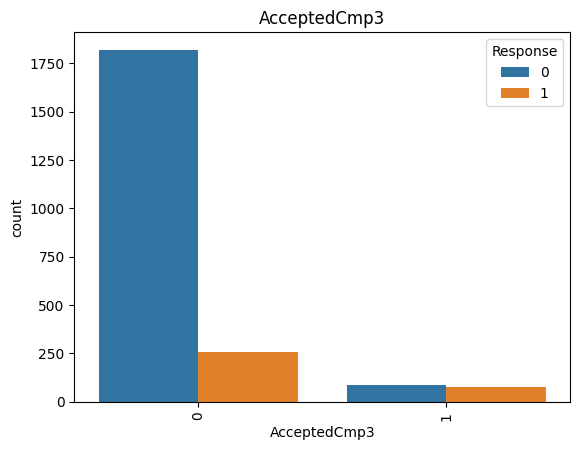

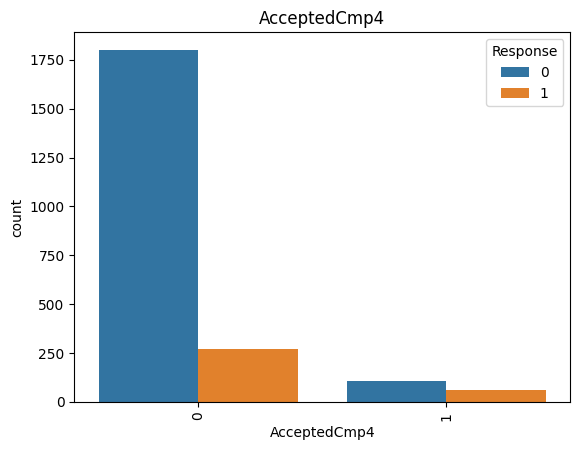

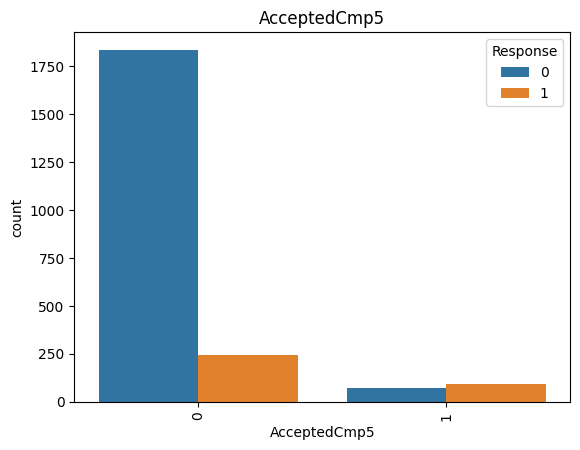

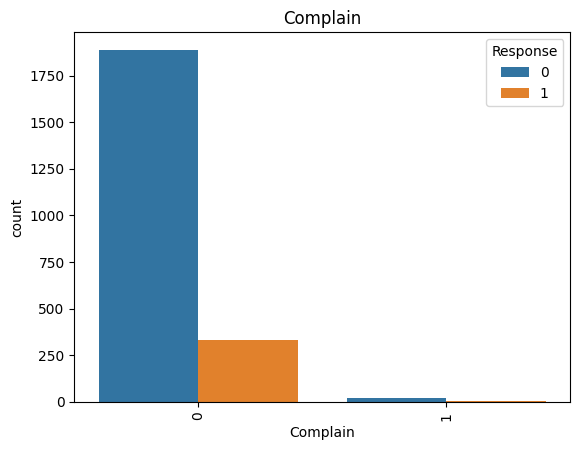

In [ ]:
for i, var in enumerate(categorical_variables + bool_variables, 1):
    sns.countplot(data=df, x = var, hue = 'Response')
    plt.title(var)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df.groupby(['Marital_Status'])['ID'].count()

,ID
Marital_Status,
Absurd,2
Alone,3
Divorced,232
Married,864
Single,480
Together,580
Widow,77
YOLO,2


Посмотрим на "необычные" значения переменной `Marital_Status`.

In [ ]:
df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


In [ ]:
df['Marital_Status']  = np.where(df['Marital_Status'].isin(['Absurd', 'YOLO', 'Alone']), 'Single', df['Marital_Status'])

In [ ]:
df.groupby(['Marital_Status'])['ID'].count()

,ID
Marital_Status,
Divorced,232
Married,864
Single,487
Together,580
Widow,77


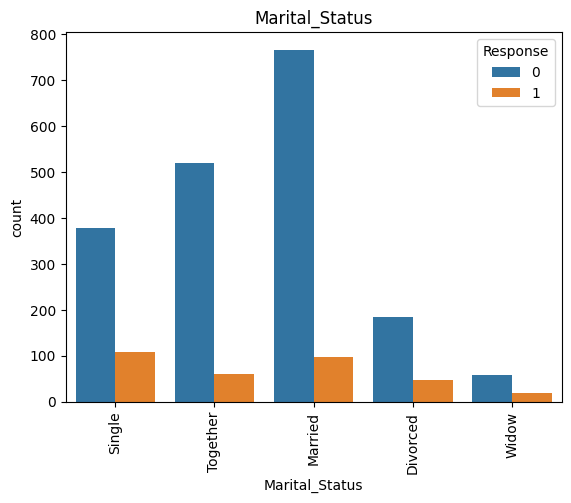

In [ ]:
sns.countplot(data=df, x = 'Marital_Status', hue = 'Response')
plt.title('Marital_Status')
plt.xticks(rotation=90)
plt.show()

Посмотрим на доли откликнувшихся в разрезе образования и семейного положения:

In [ ]:
df.groupby(['AcceptedCmp2'])[['Response']].agg(['count', 'mean'])

Response          
                count      mean
AcceptedCmp2                   
0                2210  0.142081
1                  30  0.666667

In [ ]:
df.groupby(['Marital_Status'])[['Response']].agg(['count', 'mean'])

Response          
                  count      mean
Marital_Status                   
Divorced            232  0.206897
Married             864  0.113426
Single              487  0.223819
Together            580  0.103448
Widow                77  0.246753

In [ ]:
df.groupby(['Kidhome'])[['Response']].agg(['count', 'mean'])

Response          
           count      mean
Kidhome                   
0           1293  0.171694
1            899  0.122358
2             48  0.041667

Построим boxplot-ы некоторых числовых переменных для каждого значения целевой переменной.

<Axes: xlabel='Response', ylabel='Income'>

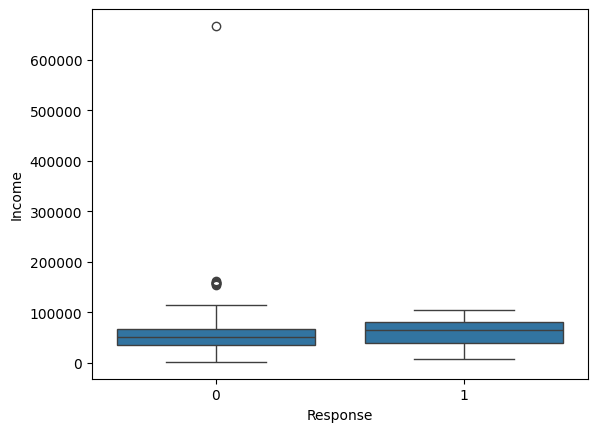

In [ ]:
sns.boxplot(data=df, y = 'Income', x = 'Response')

Некоторые модели, в том числе та, которую мы далее рассмотрим, работает только с категориальными переменными. Закодируем категориальные переменные методом OneHotEncoding.

One-Hot Encoding — это метод кодирования категориальных переменных, который преобразует каждую категорию в отдельные бинарные столбцы.

В библиотеке pandas для One-Hot Encoding используется функция pd.get_dummies(). Для каждого категориального столбца он создает новые бинарные столбцы, соответствующие уникальным значениям этого столбца. Каждый бинарный столбец содержит значения 1 или 0 в зависимости от принадлежности записи к данной категории.

In [ ]:
data = pd.get_dummies(df, columns = ['Education', 'Marital_Status'], drop_first=True)

Посмотрим, что получилось:

In [ ]:
data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,1,False,True,False,False,False,True,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,False,True,False,False,False,True,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,False,True,False,False,False,False,True,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,False,True,False,False,False,False,True,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,False,False,False,True,True,False,False,False


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

Из столбца `Education` получилось 5 новых столбцов:  `Education_2n Cycle`, `Education_Basic`
       `Education_Graduation`, `Education_Master`, `Education_PhD`

In [ ]:
df[['ID', 'Education']].head(1)

,ID,Education
0,5524,Graduation


In [ ]:
data[['ID', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']].head(1)

,ID,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,False,True,False,False


Удалим пропуски и выбросы из столбца Income

In [ ]:
data.dropna(subset=['Income'], inplace = True)

In [ ]:
data = data[(data['Income'] <= data['Income'].quantile(0.995))]

<Axes: xlabel='Response', ylabel='Income'>

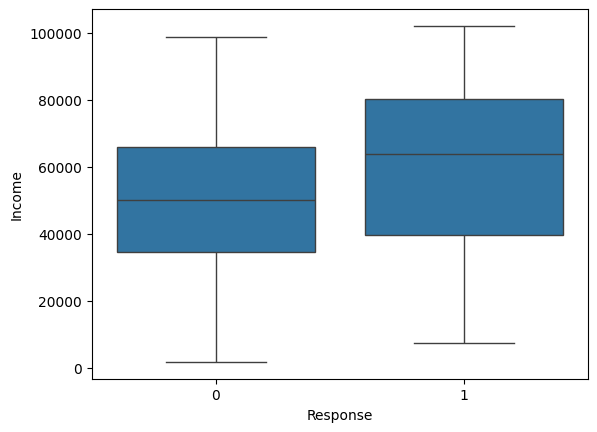

In [ ]:
sns.boxplot(data=data, y = 'Income', x = 'Response')

Из поля `Dt_Customer` получим количество дней, прошедших с первого раза, когда клиент использовал услуги кампании.
Из даты рождения получим возраст.

In [ ]:
datetime.datetime.today()

datetime.datetime(2025, 12, 13, 11, 25, 13, 902047)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2204 non-null   int64  
 1   Year_Birth               2204 non-null   int64  
 2   Income                   2204 non-null   float64
 3   Kidhome                  2204 non-null   int64  
 4   Teenhome                 2204 non-null   int64  
 5   Dt_Customer              2204 non-null   object 
 6   Recency                  2204 non-null   int64  
 7   MntWines                 2204 non-null   int64  
 8   MntFruits                2204 non-null   int64  
 9   MntMeatProducts          2204 non-null   int64  
 10  MntFishProducts          2204 non-null   int64  
 11  MntSweetProducts         2204 non-null   int64  
 12  MntGoldProds             2204 non-null   int64  
 13  NumDealsPurchases        2204 non-null   int64  
 14  NumWebPurchases          2204

In [ ]:
data['days'] = (datetime.datetime(2015, 1, 1, 0, 0, 0) -  pd.to_datetime(data['Dt_Customer'])).dt.days
data = data.drop(['Dt_Customer'], axis=1)

In [ ]:
data['Year_Birth'].min()

1893

In [ ]:
data['Age'] = 2015 - data['Year_Birth']
data = data.drop(['Year_Birth'], axis=1)

In [ ]:
data.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,days,Age
0,5524,58138.0,0,0,58,635,88,546,172,88,...,False,True,False,False,False,True,False,False,849,58
1,2174,46344.0,1,1,38,11,1,6,2,1,...,False,True,False,False,False,True,False,False,299,61
2,4141,71613.0,0,0,26,426,49,127,111,21,...,False,True,False,False,False,False,True,False,498,50
3,6182,26646.0,1,0,26,11,4,20,10,3,...,False,True,False,False,False,False,True,False,325,31
4,5324,58293.0,1,0,94,173,43,118,46,27,...,False,False,False,True,True,False,False,False,347,34


In [ ]:
data.drop(['ID'], axis=1, inplace=True) # удалим идентификатор клиента - для анализа он не нужен

Теперь построим таблицу корреляций между переменными.
Коэффициент корреляция Пирсона измеряется по шкале от -1 до 1. 0 - отсутствие линейной связи, значения, близкие к -1 - сильная отрицательная линейная связь, 1 - сильная положительная линейная связь.

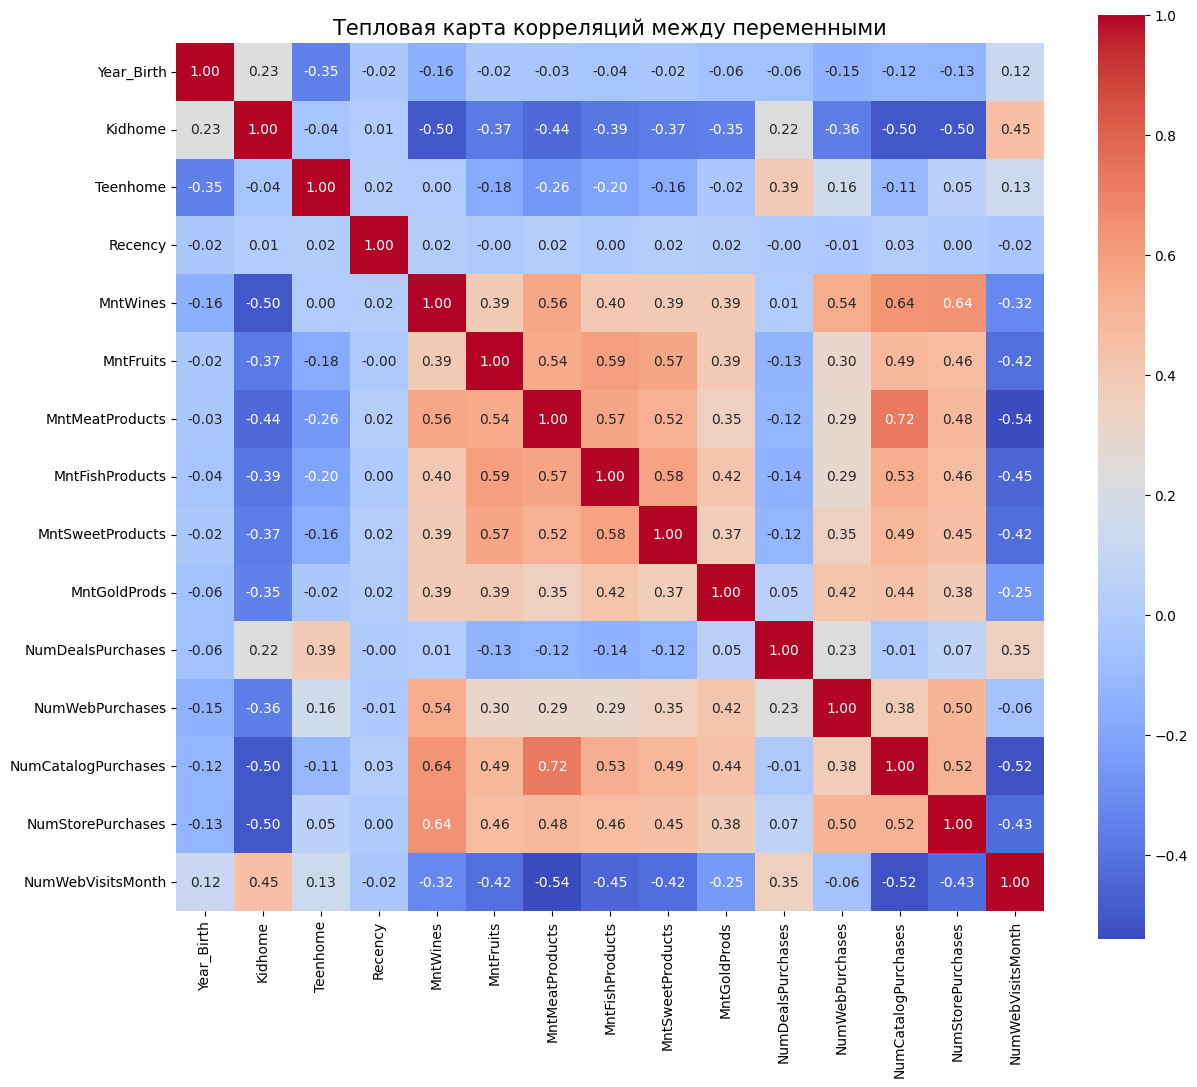

In [ ]:
correlation_matrix = df[int_columns].corr(numeric_only=True)

# Строим тепловую карту (heatmap) корреляций
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Тепловая карта корреляций между переменными', fontsize=15)
plt.yticks(rotation=0)
plt.show()

## Логистическая регрессия

Попробуем научиться предсказывать отклик клиента на кампанию с помощью логистической регрессии.

$ P(Response = 1) = \sigma(w_0+w_1*Income + ...) $,
где $ \sigma(x) = \frac{1}{1+e^{(-x)}} $

In [ ]:
X_columns = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'days']

In [ ]:
lr =  LogisticRegression(solver='liblinear')
X = data.drop(['Response'], axis=1)
y = data['Response']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
ytrain.value_counts()

,count
Response,
0,1314
1,228


In [ ]:
Xtrain = Xtrain[X_columns]
Xtest = Xtest[X_columns]
lr.fit(Xtrain, ytrain)
pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)
pred_train_prob = lr.predict_proba(Xtrain)
pred_test_prob = lr.predict_proba(Xtest)

#### Метрики качества модели

##### **Accuracy, Precision, Recall, F1**

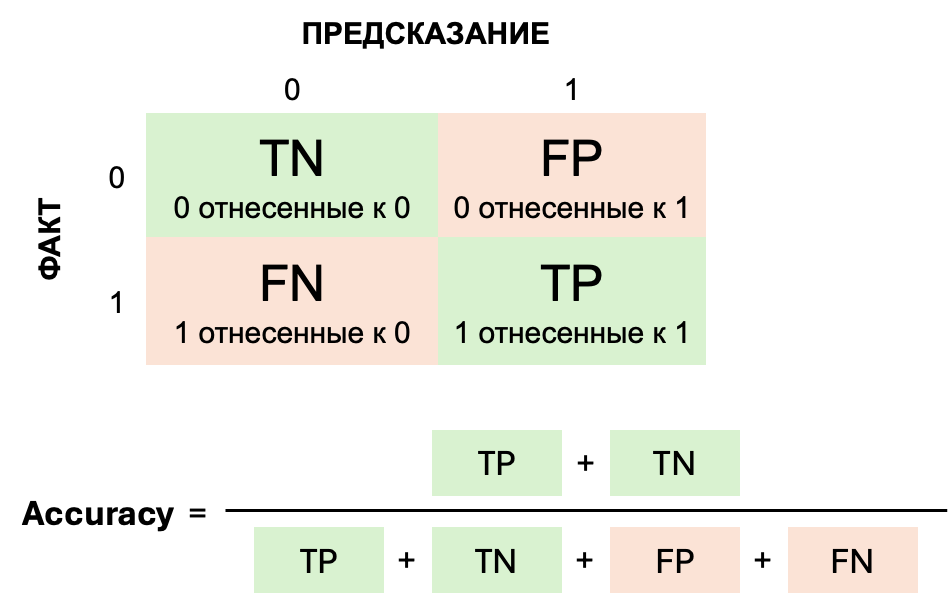

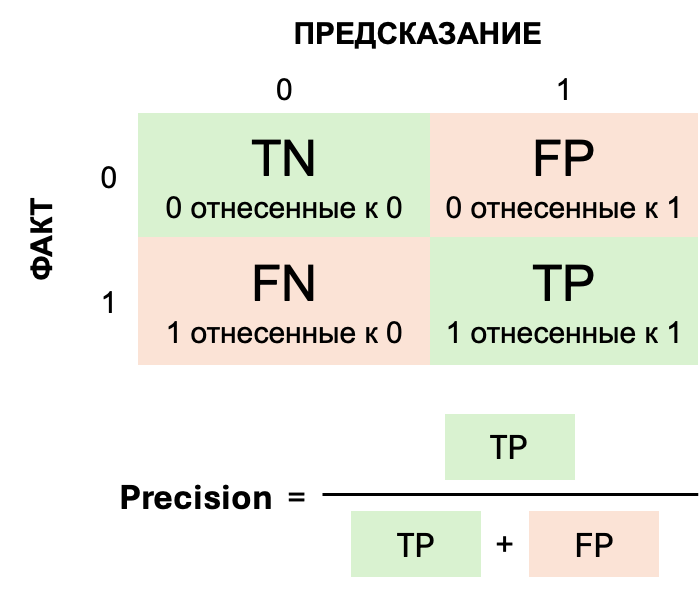

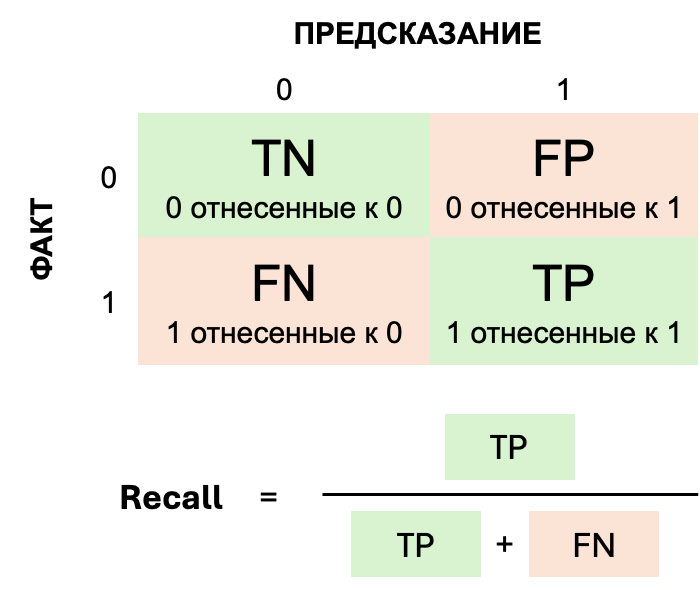

In [ ]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train), 3))
print('ROC AUC, train:', round(roc_auc_score(ytrain, pred_train_prob[:, 1]), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test), 3))
print('ROC AUC, test:', round(roc_auc_score(ytest, pred_test_prob[:, 1]), 3))

Accuracy score, train: 0.866
Recall score, train: 0.246
Precision score, train: 0.615
ROC AUC, train: 0.84

Accuracy score, test: 0.863
Recall score, test: 0.304
Precision score, test: 0.608
ROC AUC, test: 0.82


Наивные предсказания:

In [ ]:
pred_train_0 = np.zeros(Xtrain.shape[0]) # никто не откликнется
pred_test_0 = np.zeros(Xtest.shape[0])
pred_train_2 = Xtrain['AcceptedCmp2'] # отклик будет как в компании 2
pred_test_2 = Xtest['AcceptedCmp2']

In [ ]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train_0), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train_0), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train_0), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test_0), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test_0), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test_0), 3))

Accuracy score, train: 0.852
Recall score, train: 0.0
Precision score, train: 0.0

Accuracy score, test: 0.846
Recall score, test: 0.0
Precision score, test: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train_2), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train_2), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train_2), 3))
print('ROC AUC, train:', round(roc_auc_score(ytrain, pred_train_2), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test_2), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test_2), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test_2), 3))
print('ROC AUC, test:', round(roc_auc_score(ytest, pred_test_2), 3))

Accuracy score, train: 0.854
Recall score, train: 0.048
Precision score, train: 0.579
ROC AUC, train: 0.521

Accuracy score, test: 0.855
Recall score, test: 0.078
Precision score, test: 0.8
ROC AUC, test: 0.537


Стандартизируем данные:

In [ ]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_norm = scaler.transform(Xtrain)
Xtest_norm = scaler.transform(Xtest)
lr =  LogisticRegression(solver= 'liblinear')
lr.fit(Xtrain_norm, ytrain)
pred_train = lr.predict(Xtrain_norm)
pred_test = lr.predict(Xtest_norm)
pred_train_prob = lr.predict_proba(Xtrain_norm)
pred_test_prob = lr.predict_proba(Xtest_norm)

In [ ]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train), 3))
print('ROC AUC, train:', round(roc_auc_score(ytrain, pred_train_prob[:, 1]), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test), 3))
print('ROC AUC, test:', round(roc_auc_score(ytest, pred_test_prob[:, 1]), 3))

Accuracy score, train: 0.901
Recall score, train: 0.513
Precision score, train: 0.741
ROC AUC, train: 0.921

Accuracy score, test: 0.9
Recall score, test: 0.49
Precision score, test: 0.781
ROC AUC, test: 0.896


Обернем обучение и подсчет метрик в функцию, чтобы не дублировать код:

In [ ]:

def evaluate_model(model_name, model, Xtrain, Xtest, ytrain, ytest):
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)
    pred_train_prob = model.predict_proba(Xtrain)
    pred_test_prob = model.predict_proba(Xtest)

    train_metrics = {
        'accuracy': round(accuracy_score(ytrain, pred_train), 3),
        'recall': round(recall_score(ytrain, pred_train), 3),
        'precision': round(precision_score(ytrain, pred_train), 3),
        'roc_auc': round(roc_auc_score(ytrain, pred_train_prob[:, 1]), 3)
    }

    test_metrics = {
        'accuracy': round(accuracy_score(ytest, pred_test), 3),
        'recall': round(recall_score(ytest, pred_test), 3),
        'precision': round(precision_score(ytest, pred_test), 3),
        'roc_auc': round(roc_auc_score(ytest, pred_test_prob[:, 1]), 3)
    }

    results = {
        model_name : {
            'train': train_metrics,
            'test': test_metrics
        }
    }

    return results, pred_train, pred_train_prob, pred_test, pred_test_prob

In [ ]:
results, pred_train, pred_train_norm, pred_test, pred_test_prob = evaluate_model('Logistic Regression',  LogisticRegression(solver='liblinear'),  Xtrain, Xtest, ytrain, ytest)

In [ ]:
results_df = pd.DataFrame()

In [ ]:
for model_name, datasets in results.items():
    for dataset, metrics in datasets.items():
        row = {
                'model': model_name,
                'dataset': dataset,
                **metrics
            }
        results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)

In [ ]:
results_norm, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('Logistic Regression with standard data',  LogisticRegression(solver='liblinear'),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
def add_results(results_df, results):
    for model_name, datasets in results.items():
        for dataset, metrics in datasets.items():
            row = {
                'model': model_name,
                'dataset': dataset,
                **metrics
            }
            results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)
        return results_df

In [ ]:
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.84
1,Logistic Regression,test,0.863,0.304,0.608,0.82


In [ ]:
results_df = add_results(results_df, results_norm)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896


In [ ]:
results_norm_l1, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('Logistic Regression with standard data, L1 regularization',  LogisticRegression(solver='liblinear', penalty='l1'),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
results_norm_l2, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('Logistic Regression with standard data, L2 regularization',  LogisticRegression(solver='liblinear', penalty='l2'),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
results_norm_el, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('Logistic Regression with standard data, elasticnet regularization',  LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
results_df = add_results(results_df, results_norm_l1)
results_df = add_results(results_df, results_norm_l2)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896


In [ ]:
results_df = add_results(results_df, results_norm_el)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


In [ ]:
results_norm_el, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('Logistic Regression with standard data, elasticnet regularization',  LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
from sklearn.svm import SVC

In [ ]:
results_norm_svc, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('SVC',   SVC(probability=True),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
results_df = add_results(results_df, results_norm_svc)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


Гауссовский наивный классификатор

In [ ]:
import numpy as np

x1 = 170
x2 = 185
μ = 180
σ = 10

z1 = (x - μ) / σ
z2 = (x2 - μ) / σ
print(z1, z2)

P2 = (1 / (np.sqrt(2 * np.pi) * σ)) * np.exp(-0.5 * z1**2)

P2 = (1 / (np.sqrt(2 * np.pi) * σ)) * np.exp(-0.5 * z2**2)
print(P)

-1.0 0.5
0.02419707245191434


In [ ]:
import numpy as np
from scipy.stats import norm

mu = 180
sigma = 10
a = 170
b = 185
a_c, b_c = norm.cdf(b, mu, sigma), norm.cdf(a, mu, sigma)
print(a_c, b_c)
prob = a_c - b_c
print(f"P({a} ≤ X ≤ {b}) = {prob}")

0.6914624612740131 0.15865525393145707
P(170 ≤ X ≤ 185) = 0.532807207342556


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
results_norm_gb, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model(' GaussianNB',   GaussianNB(),  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
results_df = add_results(results_df, results_norm_gb)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


In [ ]:
confusion_matrix(ytest, pred_test_norm)

array([[475,  85],
       [ 46,  56]])

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
results_norm_knn, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('kNN, k=5', knn,  Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
test_point = Xtest_norm[0].reshape(1, -1)
distances, indices = knn.kneighbors(test_point, n_neighbors=5)
print(f"Ближайшие соседи для объекта {test_point[0]}:")
print("="*50)
for i, (dist, idx) in enumerate(zip(distances[0], indices[0]), 1):
    print(f"Сосед {i}:")
    print(f"Расстояние: {dist}")
    print(f"Признаки: {Xtrain.iloc[idx]}")
    print(f"Класс: {ytrain[idx]}")

Ближайшие соседи для объекта [-0.10930386  0.51209334 -0.83012541  0.91638427  1.11123463  0.09054308
 -0.53701266 -0.00770283 -0.0227885   0.01896999 -0.54936063  0.90644382
 -0.01472066  0.51211664  1.01884964 -0.55168075 -0.29311345 -0.27851056
 -0.27306494 -0.26474557 -0.11169323 -0.09911197 -0.15895269 -1.00129786
  2.31773614 -0.538866    1.22441399 -0.52582323 -0.58084486 -0.18494656
 -0.74552326]:
Сосед 1:
Расстояние: 2.2313782904334025
Признаки: Age                             55
Income                     47353.0
Kidhome                          0
Teenhome                         1
Recency                         93
MntWines                       184
MntFruits                        2
MntMeatProducts                 19
MntFishProducts                  8
MntSweetProducts                 8
MntGoldProds                     4
NumDealsPurchases                3
NumWebPurchases                  2
NumCatalogPurchases              2
NumStorePurchases                6
NumWebVisitsMont

In [ ]:
pd.set_option('display.max_colwidth', 100)
results_df = add_results(results_df, results_norm_knn)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


In [ ]:
results_norm_knn2, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('kNN, k=2',  KNeighborsClassifier(n_neighbors=2), Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
pd.set_option('display.max_colwidth', 100)
results_df = add_results(results_df, results_norm_knn2)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


<Axes: xlabel='Income', ylabel='Age'>

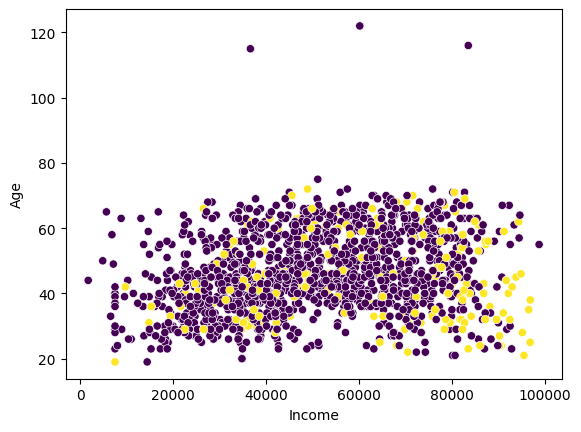

In [ ]:
sns.scatterplot(data=Xtrain, x='Income', y='Age', c=ytrain)

Теперь попробуем решить эту задачу с помощью решающего дерева.
Подробнее об этом алгоритме поговорим на следующем занятии, сейчас кратко расскажем суть.

Решающее дерево (Decision Tree) — это алгоритм машинного обучения, который предсказывает значение целевой переменной (в классификации или регрессии) путём построения дерева решений (логично;))

**Структура дерева:**
Корень — начальный узел, содержащий все данные.

1. Внутренние узлы — содержат условия по конкретному признаку (например, «Возраст > 30?»).

2. Ветви — возможные результаты условия (мы будем рассматривать бинарные решающие деревья, то есть варианта только два - да или нет)

3. Листья — конечные узлы с прогнозом (классом или числом).

**Как строится дерево:**

Алгоритм рекурсивно делит данные на два подмножества:
выбирается признак и порог, которые лучше всего разделяют данные


Критерии останова:

1. Все объекты в узле принадлежат одному классу.

2. Достигнута максимальная глубина.

3. Слишком мало объектов для дальнейшего разделения.

Преимущества:

1. Простая интерпретация

2. Не требует масштабирования данных.

3. Может работать с числовыми и категориальными данными.

Недостатки:

1. Склонность к переобучению (решается обрезкой, ограничением глубины).

2. Нестабильность (малые изменения данных могут изменить дерево).


In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
results_norm_dt, pred_train_norm, pred_train_prob_norm, pred_test_norm, pred_test_prob_norm = evaluate_model('DecisionTree',  dt, Xtrain_norm, Xtest_norm, ytrain, ytest)

In [ ]:
pd.set_option('display.max_colwidth', 100)
results_df = add_results(results_df, results_norm_dt)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


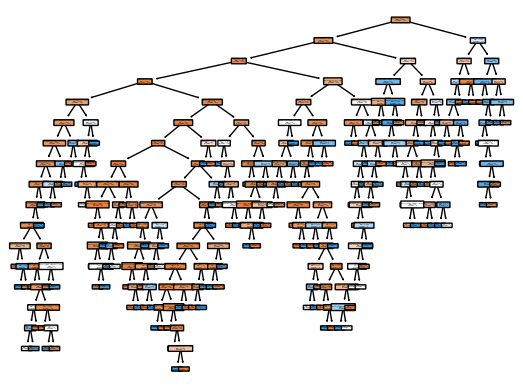

In [ ]:
plot_tree(dt, feature_names=Xtrain.columns, filled=True, rounded=True)
plt.show()

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=3)

In [ ]:
results_norm_dt3, pred_train, pred_train_prob, pred_test, pred_test_prob = evaluate_model('DecisionTree, max_depth=3',  dt3, Xtrain, Xtest, ytrain, ytest)

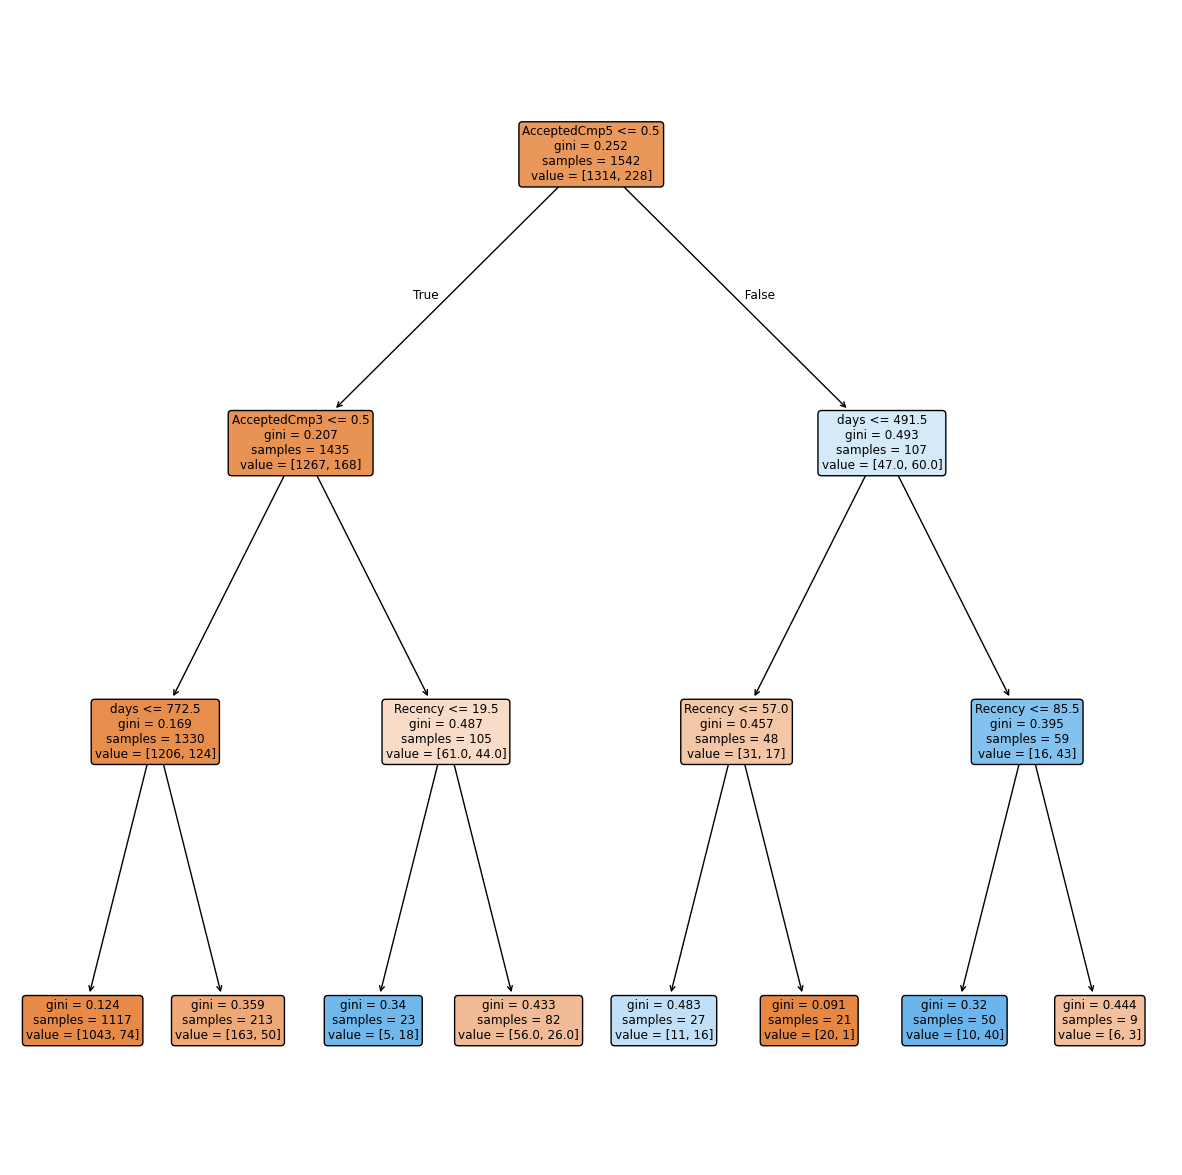

In [ ]:
plt.figure(figsize=(15, 15))
plot_tree(dt3, feature_names=Xtrain.columns, filled=True, rounded=True)
plt.show()

In [ ]:
results_df = add_results(results_df, results_norm_dt3)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


In [ ]:
results_norm_dt10, pred_train, pred_train_prob, pred_test, pred_test_prob = evaluate_model('DecisionTree, max_depth=10',  DecisionTreeClassifier(max_depth=10), Xtrain, Xtest, ytrain, ytest)

In [ ]:
results_df = add_results(results_df, results_norm_dt10)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


In [ ]:
results_df[results_df['dataset']=='test'].sort_values(by=['roc_auc', 'precision'], ascending=False)

,model,dataset,accuracy,recall,precision,roc_auc
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
11,SVC,test,0.884,0.363,0.755,0.879
1,Logistic Regression,test,0.863,0.304,0.608,0.820
15,"kNN, k=5",test,0.861,0.245,0.625,0.782
13,GaussianNB,test,0.802,0.549,0.397,0.764
21,"DecisionTree, max_depth=3",test,0.861,0.284,0.604,0.747
17,"kNN, k=2",test,0.856,0.157,0.640,0.737


In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(Xtrain_norm, ytrain)

LogisticRegression(solver='liblinear')

In [ ]:
pd.DataFrame(zip(lr.coef_[0], Xtrain.columns), columns=['coef', 'feature']).sort_values(by='coef')

,coef,feature
4,-0.935765,Recency
26,-0.695599,Marital_Status_Married
14,-0.651535,NumStorePurchases
28,-0.575574,Marital_Status_Together
3,-0.496642,Teenhome
5,-0.382210,MntWines
8,-0.146128,MntFishProducts
22,-0.112880,Education_Basic
29,-0.049398,Marital_Status_Widow
9,-0.041709,MntSweetProducts


In [ ]:
Xtrain_upd = Xtrain.copy()
Xtrain_upd['Mnt'] = Xtrain['MntWines'] + Xtrain['MntFruits']\
       + Xtrain['MntMeatProducts'] + Xtrain['MntFishProducts'] + Xtrain['MntSweetProducts']\
       + Xtrain['MntGoldProds']
Xtrain_upd['Purchases'] =  Xtrain_upd['NumWebPurchases'] +Xtrain_upd['NumCatalogPurchases']

Xtest_upd = Xtest.copy()
Xtest_upd['Mnt'] = Xtest['MntWines'] + Xtest['MntFruits']\
       + Xtest['MntMeatProducts'] + Xtest['MntFishProducts'] + Xtest['MntSweetProducts']\
       + Xtest['MntGoldProds']
Xtest_upd['Purchases'] =  Xtest_upd['NumWebPurchases'] + Xtest_upd['NumCatalogPurchases']

In [ ]:
X_columns = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Mnt', 'Purchases', 'NumDealsPurchases',   'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'days']

In [ ]:
lr = LogisticRegression(solver='liblinear')
Xtrain_upd = Xtrain_upd[X_columns]
Xtest_upd = Xtest_upd[X_columns]

scaler = StandardScaler()
scaler.fit(Xtrain_upd)
Xtrain_norm_upd = scaler.transform(Xtrain_upd)
Xtest_norm_upd = scaler.transform(Xtest_upd)

lr_upd =  LogisticRegression(solver= 'liblinear')
results_norm_lr_p, pred_train, pred_train_prob, pred_test, pred_test_prob = evaluate_model('Linear regression with features preprocessing',  lr_upd, Xtrain_upd, Xtest_upd, ytrain, ytest)

In [ ]:
results_df = add_results(results_df, results_norm_lr_p)
results_df

,model,dataset,accuracy,recall,precision,roc_auc
0,Logistic Regression,train,0.866,0.246,0.615,0.840
1,Logistic Regression,test,0.863,0.304,0.608,0.820
2,Logistic Regression with standard data,train,0.901,0.513,0.741,0.921
3,Logistic Regression with standard data,test,0.900,0.490,0.781,0.896
4,"Logistic Regression with standard data, L1 regularization",train,0.902,0.509,0.748,0.921
5,"Logistic Regression with standard data, L1 regularization",test,0.902,0.490,0.794,0.896
6,"Logistic Regression with standard data, L2 regularization",train,0.901,0.513,0.741,0.921
7,"Logistic Regression with standard data, L2 regularization",test,0.900,0.490,0.781,0.896
8,"Logistic Regression with standard data, elasticnet regularization",train,0.902,0.509,0.748,0.921
9,"Logistic Regression with standard data, elasticnet regularization",test,0.902,0.490,0.794,0.896


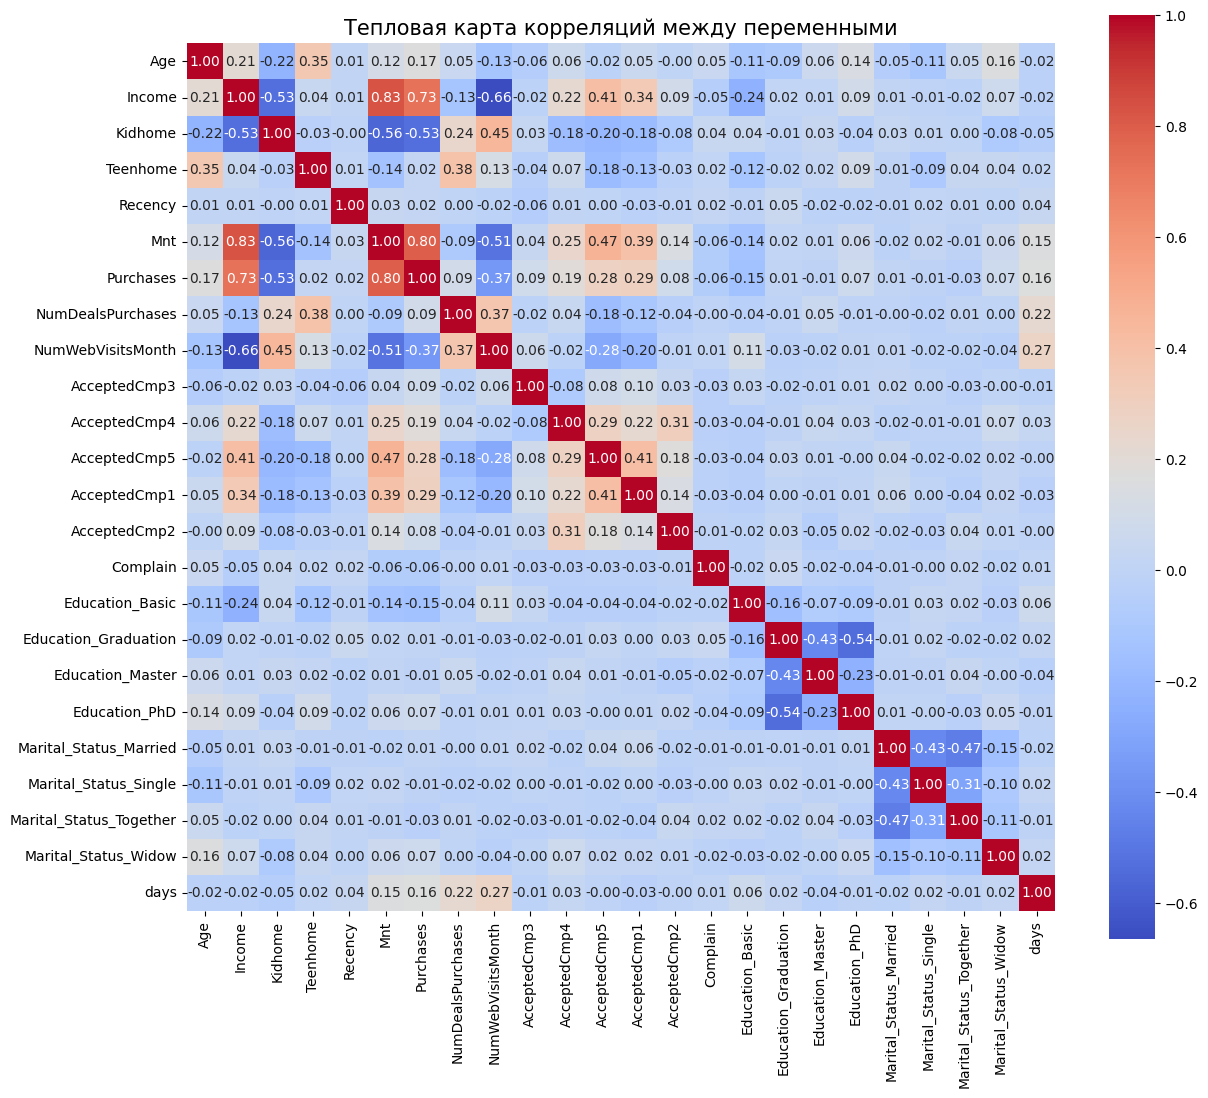

In [ ]:
correlation_matrix = Xtrain_upd.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Тепловая карта корреляций между переменными', fontsize=15)
plt.yticks(rotation=0)
plt.show()